In [197]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import csv

In [198]:
with open('stats_bees.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    stats_full = list(reader)

In [200]:
eval_examples = 153

for s in stats_full:
    train_mode = None
    if s['retrained'] == 'True':
        if s['shallow_retrain']  == 'True':
            train_mode = 'shallow'
        else: 
            train_mode = 'deep'
    else:
        train_mode = 'from_scratch'
    s['train_mode'] = train_mode
    
    s['fps'] = 1.0 / (float(s['eval_time']) / eval_examples)

In [255]:
#Color
N = 6
cmx = cm.rainbow(np.random.rand(3))
c_map = {'shallow' : cmx[0], 'deep' : cmx[1], 'from_scratch': cmx[2]}
cmx = cm.rainbow(range(0, N *50, 50))

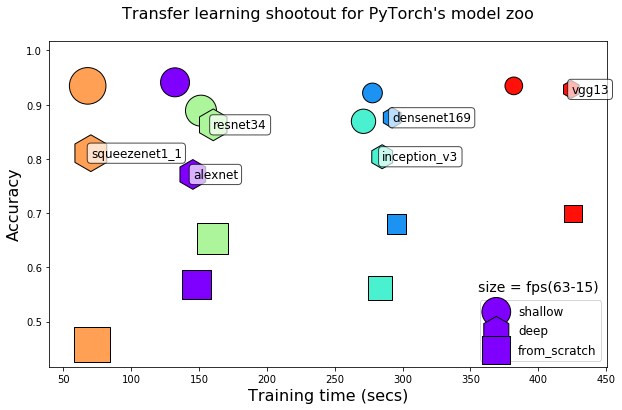

In [291]:
plt.figure(figsize=(10, 6))

marker = {'shallow' : 'o', 'deep' : 'h', 'from_scratch' : 's'}
props = dict(boxstyle='round', facecolor='w', alpha=0.7)

for t in c_map.keys():
    stats = list(filter(lambda s: s['train_mode']==t, stats_full))

    colors = [cmx[j] for j in range(N)]
    train_mode = [s['train_mode'] for s in stats]

    #Size
    fps = [float(s['fps'])*20.0 for s in stats]

    #Labels
    names = [s['name'] for s in stats]
    #X
    training_time = [float(s['training_time']) for s in stats]
    #Y
    accuracy = [float(s['accuracy']) for s in stats]
    
    plt.scatter(training_time, accuracy, s=fps, c=colors,\
                label=t, edgecolor='black', marker=marker[t])
    
    if t == 'deep':
        for i in range(len(stats)):
            plt.annotate(names[i],xy=(training_time[i], accuracy[i]), \
                         fontsize=12, va='center', bbox=props)



plt.xlabel('Training time (secs)', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

plt.legend(loc='lower right', fontsize=12, )

min_fps = min((s['fps'] for s in stats))
max_fps = max((s['fps'] for s in stats))
plt.text(400, 0.55, 'size = fps(%d-%d)' % (max_fps, min_fps), fontsize=14,
        va='bottom', ha='center')

plt.title('Transfer learning shootout for PyTorch\'s model zoo',y=1.05, fontsize=16)
plt.show()
